In [2]:
import os
os.chdir(r"C:\Users\Ramita\Desktop")
import pandas as pd
df = pd.read_csv("customerchurn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
(df['TotalCharges'])=pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())

11


In [5]:
df['TotalCharges'].isnull().sum()

np.int64(0)

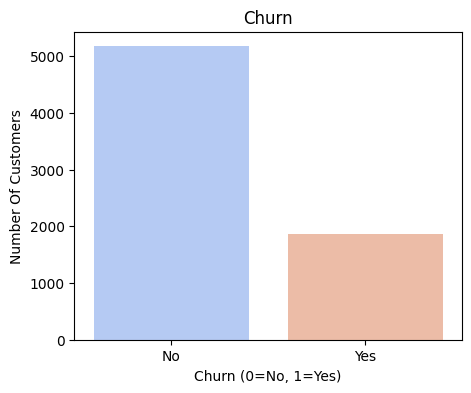

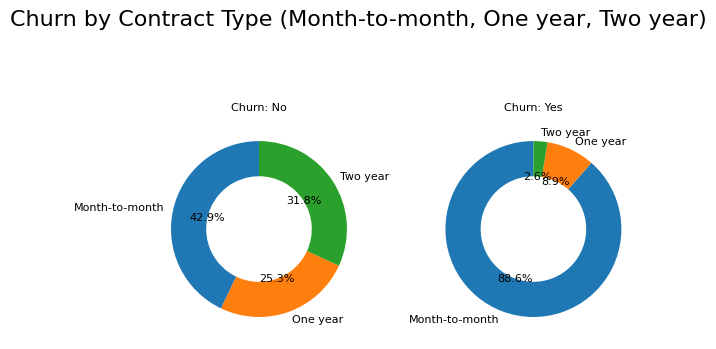

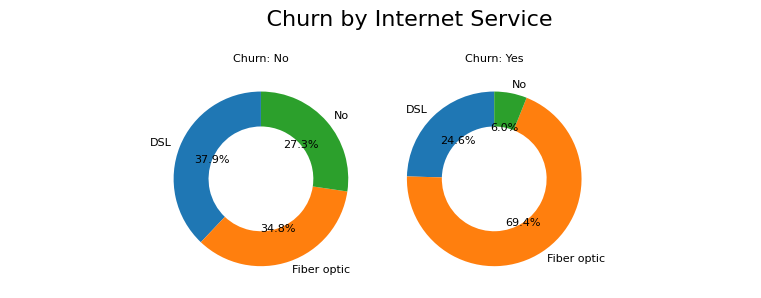

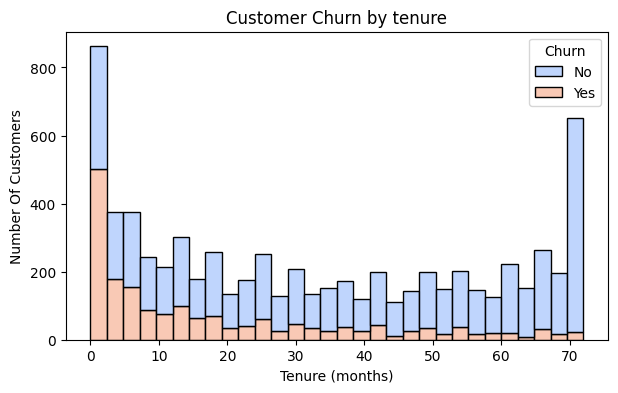

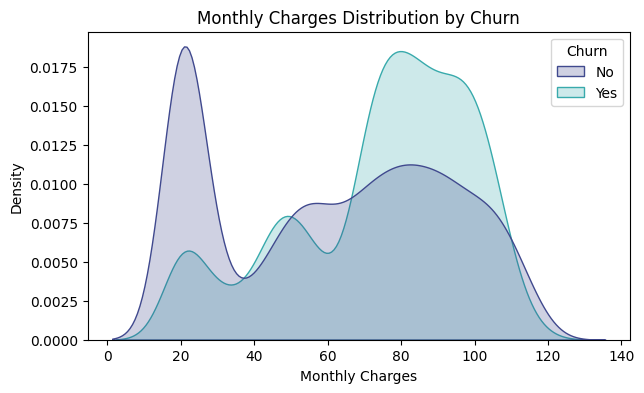

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(data=df, x='Churn', hue='Churn', palette='coolwarm', legend=False)
plt.title('Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Number Of Customers')
plt.show()

contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
fig, axes = plt.subplots(1, len(contract_churn.columns), figsize=(6,4))

for ax, churn_status in zip(axes, contract_churn.columns):
    contract_churn[churn_status].plot(
        kind='pie',
        labels=contract_churn.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width':0.4},
        ax=ax,
        textprops={'fontsize':8}
    )
    ax.set_title(f'Churn: {churn_status}', fontsize=8)
    ax.set_ylabel('') 

plt.suptitle('Churn by Contract Type (Month-to-month, One year, Two year)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


internet_churn=df.groupby(['InternetService', 'Churn']).size().unstack()
fig, axes = plt.subplots(1, len(internet_churn.columns), figsize=(5,3))

for ax, churn_status in zip(axes, internet_churn.columns):
    internet_churn[churn_status].plot(
        kind='pie',
        labels=internet_churn.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width':0.4},
        ax=ax,
        textprops={'fontsize':8}
    )
    ax.set_title(f'Churn: {churn_status}',fontsize=8)
    ax.set_ylabel('')

plt.suptitle('                                    Churn by Internet Service                            ', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, palette='coolwarm')
plt.title('Customer Churn by tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number Of Customers')
plt.show()

plt.figure(figsize=(7,4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, palette='mako')
plt.title('Monthly Charges Distribution by Churn')
plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.show()

In [21]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

from sklearn.model_selection import train_test_split
X=df.drop('Churn', axis=1)
y=df['Churn']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix 
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

[[935 101]
 [158 215]]


In [23]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  

from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'No':0, 'Yes':1})  


num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


print(df['Churn'].isnull().sum())


df = df.dropna(subset=['Churn'])

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"===== {model.__class__.__name__} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy:", round(accuracy_score(y_test, y_pred),4))
    print("Precision:", round(precision_score(y_test, y_pred),4))
    print("Recall:", round(recall_score(y_test, y_pred),4))
    print("F1 Score:", round(f1_score(y_test, y_pred),4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\n")

log_model = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
evaluate_model(log_model, X_train_res, y_train_res, X_test, y_test)

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
evaluate_model(dt_model, X_train_res, y_train_res, X_test, y_test)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)
evaluate_model(rf_model, X_train_res, y_train_res, X_test, y_test)


0
===== LogisticRegression =====
Confusion Matrix:
 [[791 244]
 [106 268]]
Accuracy: 0.7516
Precision: 0.5234
Recall: 0.7166
F1 Score: 0.605

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1035
           1       0.52      0.72      0.60       374

    accuracy                           0.75      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.79      0.75      0.76      1409



===== DecisionTreeClassifier =====
Confusion Matrix:
 [[817 218]
 [180 194]]
Accuracy: 0.7175
Precision: 0.4709
Recall: 0.5187
F1 Score: 0.4936

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      1035
           1       0.47      0.52      0.49       374

    accuracy                           0.72      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.72      0.72      1409



===== R

In [26]:
y_pred_log = log_model.predict(X_test)
y_pred_dt  = dt_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

In [27]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']

accuracy = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf)
]

precision = [
    precision_score(y_test, y_pred_log),
    precision_score(y_test, y_pred_dt),
    precision_score(y_test, y_pred_rf)
]

recall = [
    recall_score(y_test, y_pred_log),
    recall_score(y_test, y_pred_dt),
    recall_score(y_test, y_pred_rf)
]

f1 = [
    f1_score(y_test, y_pred_log),
    f1_score(y_test, y_pred_dt),
    f1_score(y_test, y_pred_rf)
]

comparison = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

print("===== Model Comparison =====")
print(comparison)


===== Model Comparison =====
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.751597   0.523438  0.716578  0.604966
1        Decision Tree  0.717530   0.470874  0.518717  0.493639
2        Random Forest  0.769340   0.551797  0.697861  0.616293


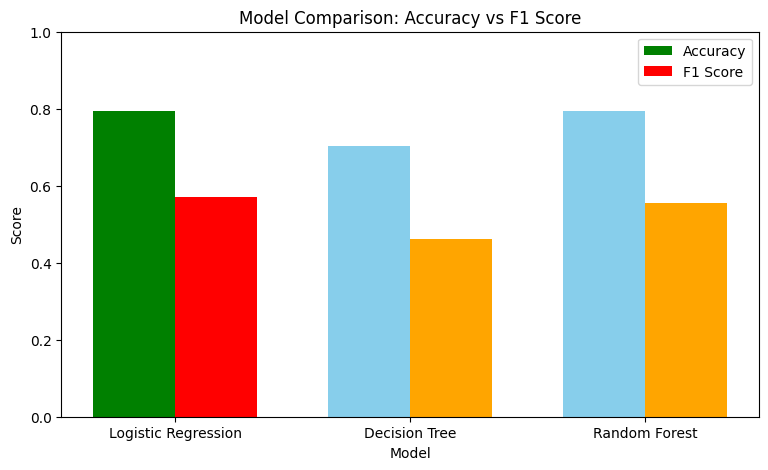

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.793471, 0.704045, 0.793471],
    'F1 Score': [0.571429, 0.460543, 0.555725]
})

best_acc_idx = model_comparison['Accuracy'].idxmax()
best_f1_idx = model_comparison['F1 Score'].idxmax()

plt.figure(figsize=(9,5))
bar_width = 0.35
index = np.arange(len(model_comparison))

accuracy_colors = ['skyblue']*len(model_comparison)
f1_colors = ['orange']*len(model_comparison)
accuracy_colors[best_acc_idx] = 'green'   
f1_colors[best_f1_idx] = 'red'           

plt.bar(index, model_comparison['Accuracy'], bar_width, label='Accuracy', color=accuracy_colors)
plt.bar(index + bar_width, model_comparison['F1 Score'], bar_width, label='F1 Score', color=f1_colors)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: Accuracy vs F1 Score')
plt.xticks(index + bar_width/2, model_comparison['Model'])
plt.ylim(0,1)
plt.legend()
plt.show()
